<a href="https://colab.research.google.com/github/HamzaAnsari8/Haberman_analysis/blob/main/Haberman_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')    # importing libraries

In [ ]:
df=pd.read_csv('/content/haberman.csv')

In [ ]:
df.columns=['Age','Year','Nodes','Survival']   # naming the colm
df.head()                                      # checking colm name

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


 **AGENDA :  Given a patient with the some Age,Year of operation and no. of lymph nodes detected , we have predict or conclude the chances wheather the patient will live less than 5 yrs or more than 5 yrs**

In [ ]:
df.shape    # checking shape of the colm

(305, 4)

In [ ]:
df.isnull().sum()   # there is no  null value in df

,0
Age,0
Year,0
Nodes,0
Survival,0


In [ ]:
df.duplicated().value_counts()   # do not remove duplicate cause it is possible that any person can have same age and their hospital experience

,count
False,288
True,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
df.Survival.value_counts()    #  checking value in survival colm

,count
Survival,
1,224
2,81


In [ ]:
df=df.replace([1,2],[0,1])   # changing survival colm value

In [ ]:
df.Survival.value_counts() # changed survival colm value

,count
Survival,
0,224
1,81


In [ ]:
df.describe()    # min(age)= 30  max(age)= 83
                 # year[1958-1969]
                 # Nodes= 0 to 52      nodes have higher count density between 0 and 4(75%)
                 # Survival = 0 and 1
                 #

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**UNIVARIATE ANALYSIS**

In [ ]:
df.Survival.value_counts()

,count
Survival,
0,224
1,81


In [ ]:
df.Survival.value_counts(1)    # Insights : only 27% people will be living less than 5 yrs, which means the dataset is imbalanced

,proportion
Survival,
0,0.734426
1,0.265574


<Axes: xlabel='Survival', ylabel='count'>

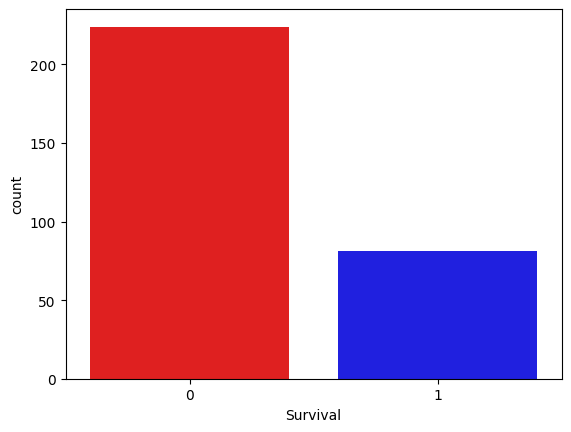

In [ ]:
  # plotting survival colm


sns.countplot(x='Survival',data=df ,palette=['r','b'])

In [ ]:
df.Age.describe()

,Age
count,305.000000
mean,52.531148
std,10.744024
min,30.000000
25%,44.000000
50%,52.000000
75%,61.000000
max,83.000000


0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

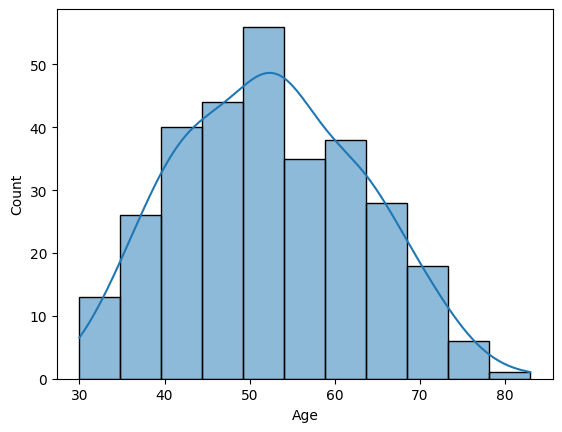

In [ ]:
# plotting age colm

print(df.Age.skew())
sns.histplot(x ='Age',data=df, binwidth=5, kde=True)    # the most of people getting surgery in age of 50 to 55

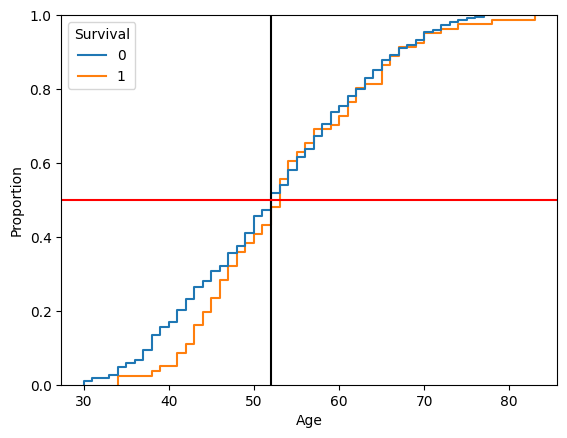

In [ ]:
sns.ecdfplot(x='Age',data=df, hue='Survival')
plt.axvline(x=52,c='black')                # vertical line for those who survived more than 5 yrs
plt.axhline(0.5,c='r')                     # horizontal line for those who survived less than 5 yrs     # kind of bivariate

#  Insights : 50% OF PEOPLE WERE 52 YEARS OR BELOW

<Axes: xlabel='Year'>

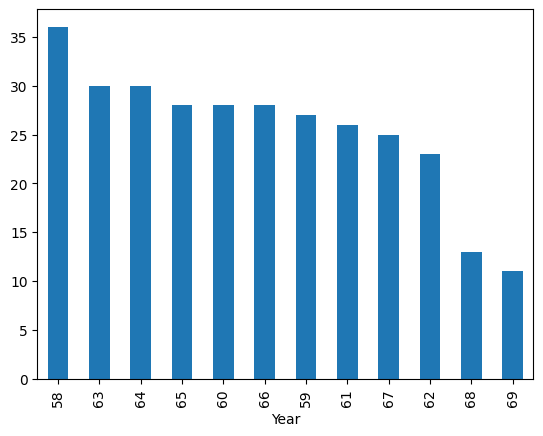

In [ ]:
df.Year.value_counts().plot(kind='bar') # checking value counts with the bar charts

In [ ]:
# plotting lymph nodes

df.Nodes.describe()

,Nodes
count,305.000000
mean,3.839344
std,7.283978
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,52.000000


<Axes: xlabel='Nodes'>

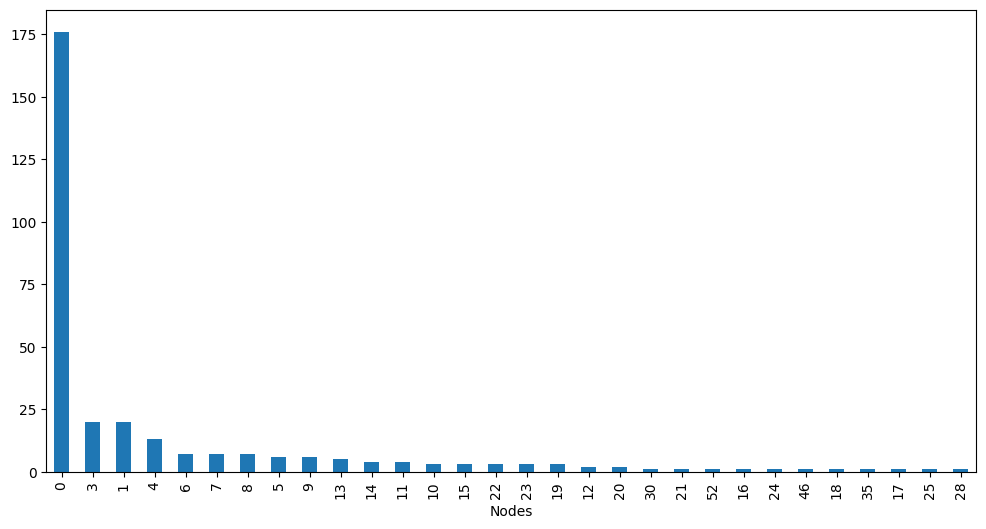

In [ ]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind='bar') # checking value counts with the bar charts

2.940405369162834


<Axes: xlabel='Nodes', ylabel='Count'>

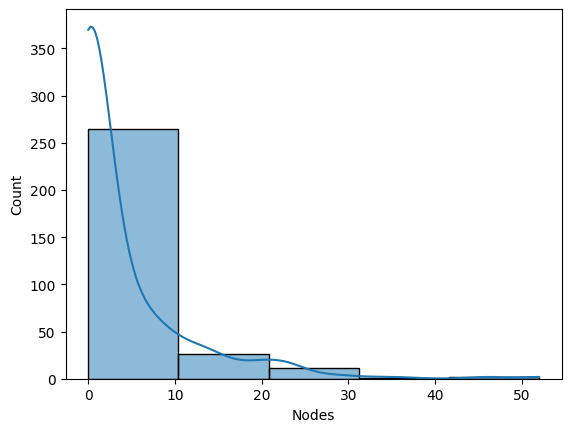

In [ ]:
print(df.Nodes.skew())
sns.histplot(x='Nodes',data=df,binwidth=10,kde=True)


#  Insights  : max density  count for nodes are between 0 to 10

**BIVARIATE ANALYSIS**

In [ ]:
# possible analysis for bivariate
# Age-Survival
# Age-Nodes-Survival
# Nodes-Survival
# Year-Survival
# Age-nodes
# Year-Nodes
# Age-Years


<Axes: xlabel='Survival', ylabel='Age'>

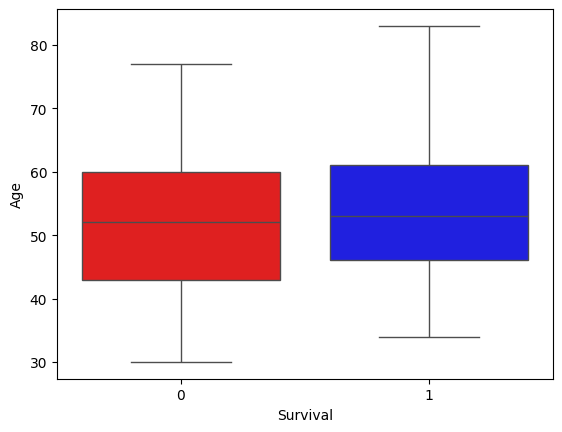

In [ ]:
sns.boxplot(x='Survival',y='Age',data=df,palette=['r','b'])     # plotting both colm

# Insights : people above Age>77 will actually live lesser than 5 yrs
# Insights : people with the Age<35 will actually live more than 5 yrs

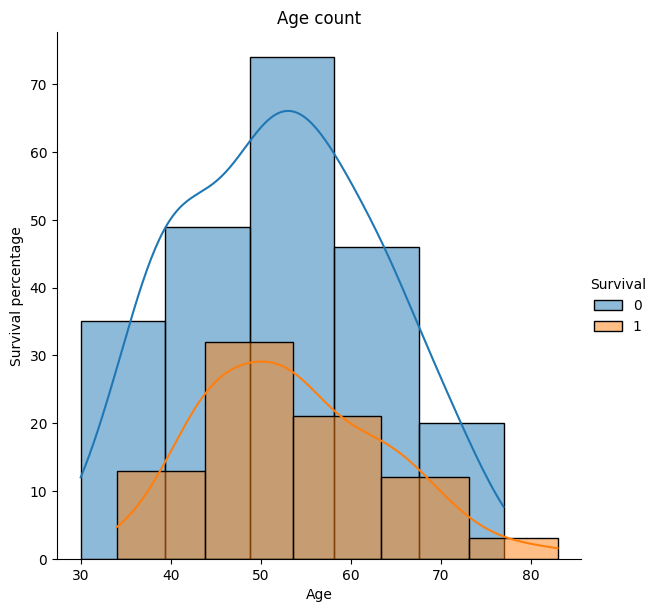

In [ ]:
sns.FacetGrid(data=df, hue='Survival',height=6).map(sns.histplot,'Age',bins=5,kde=True).add_legend()
plt.xlabel('Age')
plt.ylabel('Survival percentage')
plt.title('Age count')
plt.show();


# Insights : max % of people living lesser than 5 yrs are between 43 to 53 age group
# Insights : pepole between 30 to 33 age living more than 5 yrs
# Insights : people above Age>77 will actually live lesser than 5 yrs


 **Insights : max % of people living lesser than 5 yrs are between 43 to 53 age group**

 **Insights : pepole between 30 to 33 age living more than 5 yrs**

 **Insights : people above Age>77 will actually live lesser than 5 yr**

In [ ]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)    # it show the how many people from every age grp lived less than 5 yrs

,Survival
Age,
53,6
43,4
54,4
52,4
46,4
65,4
47,3
41,3
44,3


In [ ]:
df.Age.value_counts()    #  this shows the total of people from each age grp


   # Insights : we can get the percentage of  every age grp , that how % people lived less than 5 yrs and more than 5 yrs
   #  e.g :  Age 52 : total people= 14   and  4 people lived less than 5 year
   #                so the probablity will 4/14 = 0.285 which means 29%
   #         Age 41 :  3/10 = 30%
   #         Age 70 : 2/7 = 29%

,count
Age,
52,14
54,13
50,12
43,11
57,11
53,11
47,11
41,10
38,10


<Figure size 1200x600 with 0 Axes>

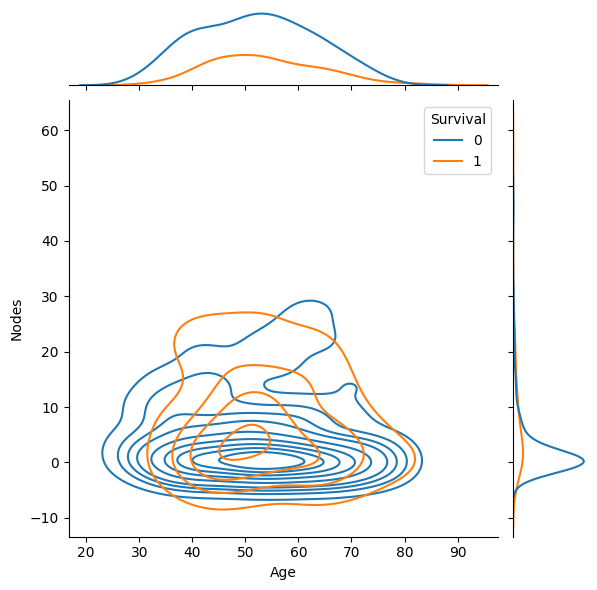

In [ ]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Nodes',data=df,hue= 'Survival',kind='kde')

# taking 3 variable on plot

<Axes: xlabel='Survival', ylabel='Nodes'>

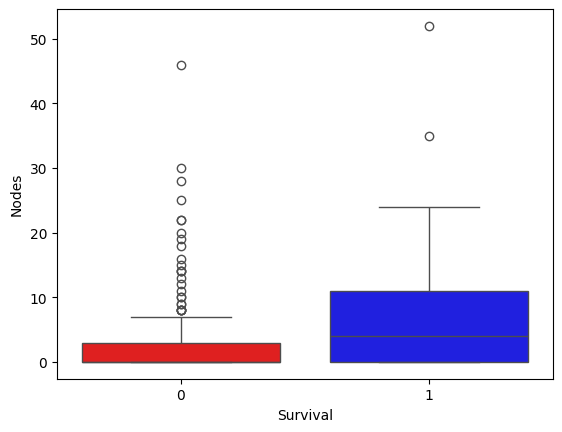

In [ ]:
sns.boxplot(x='Survival',y='Nodes',data=df,palette=['r','b'])


# Insights : 10 to 52 nodes people will live lesser than 5 yrs

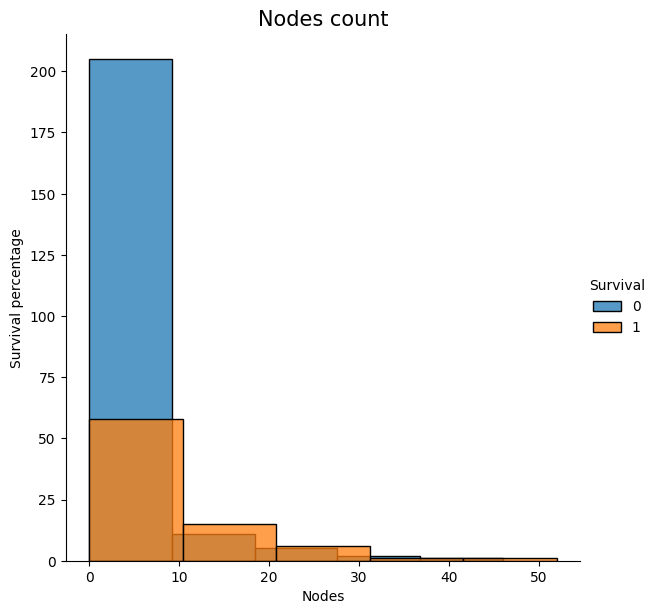

In [ ]:
sns.FacetGrid(data=df, hue='Survival',height=6).map(sns.histplot,'Nodes',bins=5).add_legend()
plt.xlabel('Nodes')
plt.ylabel('Survival percentage')
plt.title('Nodes count',size=15)
plt.show();

In [ ]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)   # how many people died  as per their no. of nodes
                                                                     # 27 people died who have 0 nodes, in less than 5 yrs

,Survival
Nodes,
0,27
3,7
1,5
5,4
13,4
9,4
6,3
4,3
11,3


In [ ]:
df.Nodes.value_counts()

#  total no. of nodes :  176 people have 0 nodes
# e.g : out 176 people, 27 people died who had a 0 nodes in less than 5 yrs
#  0 nodes  27/176= 0.1534   which means 15%
#  1 nodes=  25%
#  4 nodes= 23%
#  3 nodes= 35%

,count
Nodes,
0,176
3,20
1,20
4,13
6,7
7,7
8,7
5,6
9,6


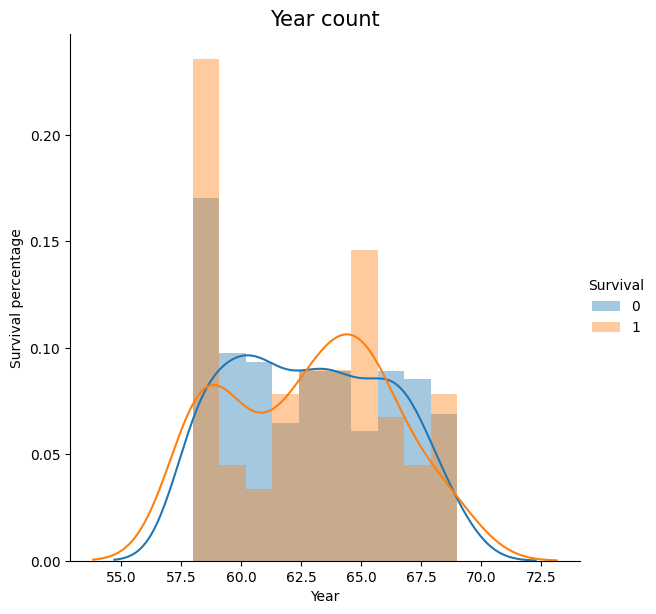

In [ ]:
sns.FacetGrid(data=df, hue='Survival',height=6).map(sns.distplot,'Year',bins=10,kde=True).add_legend()
plt.xlabel('Year')
plt.ylabel('Survival percentage')
plt.title('Year count',size=15)
plt.show();


In [ ]:
df.groupby('Survival')['Year'].value_counts().unstack()   # tatal people 24+12=36
                                                                 # dies 12  in less than 5 yrs

# Insights:       # e.g :  year 1958= 12/36=0.33 which means 33%
                  #        year 1959= 45%
                  #        year 1965= 46%




Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


<Figure size 1200x600 with 0 Axes>

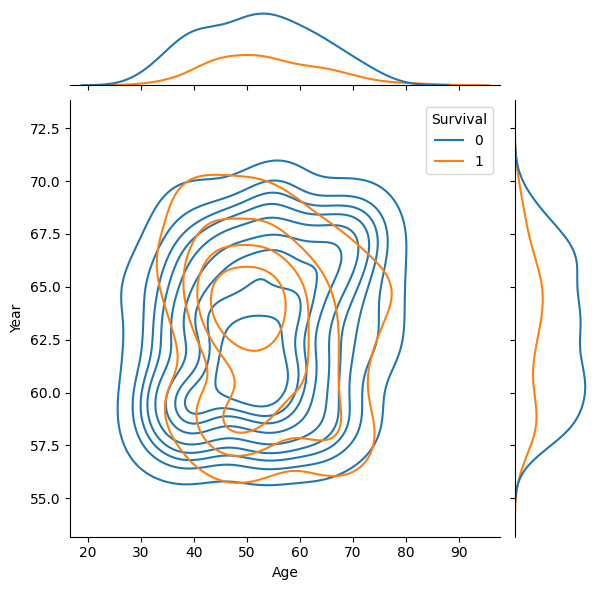

In [ ]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Year',data=df,hue= 'Survival',kind='kde')

**MULTIVARIATE ANALYSIS**

<Axes: >

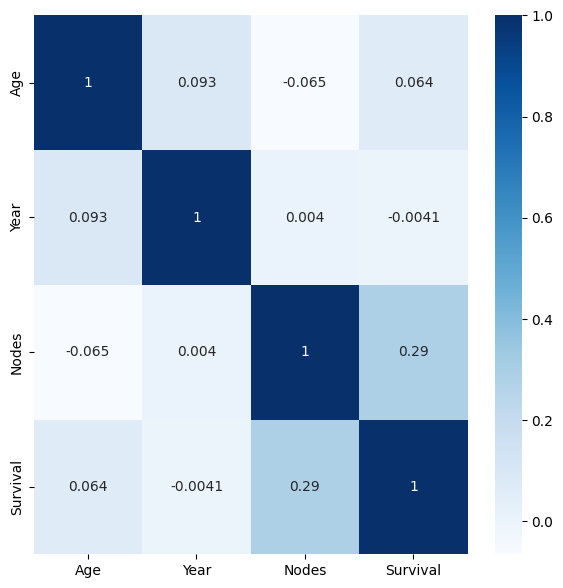

In [ ]:
plt.figure(figsize=(7,7))
corr=df.corr()         #creating pivot table with corr() function
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues')


# Insights : nodes and survival correalated by 29%